# <center> Tarea 1: Geometria Computacional y Diferencial</center>
<center>Juan Manuel Ramirez Osuna</center>

Nota: No tengo tildes en mi teclado, me disculpo por los errores de ortografia :C

## Librerias necesarias

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Primera pregunta
- Se definen las clases punto y segmento
- Se definen metodos para resolver las tres preguntas
- Realizacion de casos de la pregunta

In [374]:
# Clase punto
# Input: Dos coordenadas numericas
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    # Se define el orden establecido en el curso estableciendo como menores los puntos con mayor valor y 
    # o mismo valor y con menor valor x
    def __lt__(self, other):
        if self.y > other.y:
            return True
        elif self.y == other.y and self.x < other.x:
            return True
        else:
            return False
    
    # Puntos iguales si tienen coordenadas iguales
    def __eq__(self, other):
        return (self.x == other.x) & (self.y == other.y)
    
    # Producto cruz (en 2 dimensiones)
    # Input: punto de origen y punto de destino
    # Output: flotante
    def cross_prod(self, orig, dest):
        return (self.x - orig.x)*(dest.y-orig.y)-(self.y-orig.y)*(dest.x-orig.x)
        
# Clase segmento
# Input: Cuatro coordenadas numericas
# La clase divide las dos primeras coordenadas para el primer punto y las otras dos para el segundo
# se ordena automaticamente para que el primer punto sea el menor segun el orden previamente establecido
class segment:
    def __init__(self, x1, y1, x2, y2):
        self.p1 = point(x1,y1)
        self.p2 = point(x2,y2)
        self.order()
    
    def __repr__(self):
        return f'{self.p1} -> {self.p2}'
    
    def __str__(self):
        return f'({self.p1} -> {self.p2})'
    
    # Ordenar
    # Input: Ninguno
    # Output: Ninguno
    # La funcion ordena los puntos del segmento bajo el cual sea llamada
    def order(self):
        if self.p2 < self.p1:
            aux = self.p1
            self.p1 = self.p2
            self.p2 = aux
    
    # A lista
    # Input: Ninguno
    # Output: Ninguno
    # La funcion convierte los puntos del segmento en formato de lista de listas
    def to_array(self):
        return [[self.p1.x,self.p1.y], [self.p2.x,self.p2.y]]
    
    # Mitad
    # Input: Un valor numerico
    # Output: Punto en el cual el valor y intersecta el segmento
    # Se redondea a cuatro digitos por problemas en diferencias en resultado por truncamiento
    def middle(self, y_new):
        alpha = (y_new - self.p2.y)/(self.p1.y - self.p2.y)
        x_new = self.p2.x + alpha*(self.p1.x - self.p2.x)
        return [round(x_new,4), round(y_new,4)]
    
    # Existencia de interseccion
    # Input: Segmento
    # Output: Booleano
    def exists_inter(self, s2):
        d0 = self.p1.cross_prod(s2.p1, s2.p2)
        d1 = self.p2.cross_prod(s2.p1, s2.p2)
        d2 = s2.p1.cross_prod(self.p1, self.p2)
        d3 = s2.p2.cross_prod(self.p1, self.p2)
        return (d0*d1 < 0) and (d2*d3 < 0)
    
    # Colinealidad
    # Input: Segmento
    # Output: Booleano
    def colineal(self, s2):
        d0 = self.p1.cross_prod(s2.p1, s2.p2)
        d1 = self.p2.cross_prod(s2.p1, s2.p2)
        d2 = s2.p1.cross_prod(self.p1, self.p2)
        d3 = s2.p2.cross_prod(self.p1, self.p2)
        return (d0*d1 == 0) and (d2*d3 == 0)
        
    # Encontrar interseccion
    # Input: Segmento
    # Output: Punto, intervalo o nulo
    #         Impresion de respuesta (En el caso de la pregunta 1)
    # La funcion esta practicamente dividida en dos casos, uno para la pregunta 3 y otro para la pregunta 1
    def find_inter(self, s2):
        if self.exists_inter(s2):
            [alpha, beta] = np.matmul(\
            np.linalg.inv(\
            np.matrix([\
            [self.p1.x-self.p2.x, s2.p2.x-s2.p1.x],[self.p1.y-self.p2.y, s2.p2.y-s2.p1.y]]))\
            ,np.matrix([[s2.p2.x-self.p2.x], [s2.p2.y-self.p2.y]]))
            return point(round(self.p2.x + float(alpha) * (self.p1.x - self.p2.x),4), \
                         round(self.p2.y + float(alpha) * (self.p1.y - self.p2.y),4))
        elif self.colineal(s2):
            if self.p1 == s2.p2 or self.p2 == s2.p1:
                if self.p1 == s2.p2:
                    print(f'Los segmentos tienen una interseccion en {self.p1}')
                    return self.p1
                else:
                    print(f'Los segmentos tienen una interseccion en {self.p2}')
                    return self.p2
            elif (self.p1 < s2.p2 and s2.p1 < self.p1) or (s2.p1 < self.p2 and self.p1 < s2.p1):
                if (self.p1 < s2.p2 and s2.p1 < self.p1):
                    print(f'Los segmentos tienen una intersectan desde {s2.p2} hasta {self.p1}')
                    return segment(s2.p2.x, s2.p2.y, self.p1.x, self.p1.y)
                else:
                    print(f'Los segmentos tienen una intersectan desde {self.p2} hasta {s2.p1}')
                    return segment(s2.p1.x, s2.p1.y, self.p2.x, self.p2.y)
            else:
                print('No hay intersecciones entre los segmentos')

Los segmentos tienen una interseccion en (3,4)


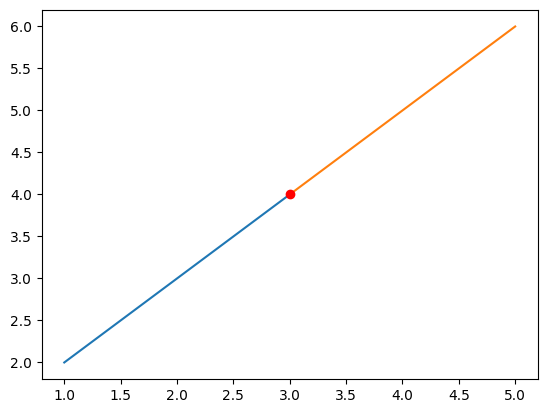

Los segmentos tienen una intersectan desde (2,3) hasta (3,4)


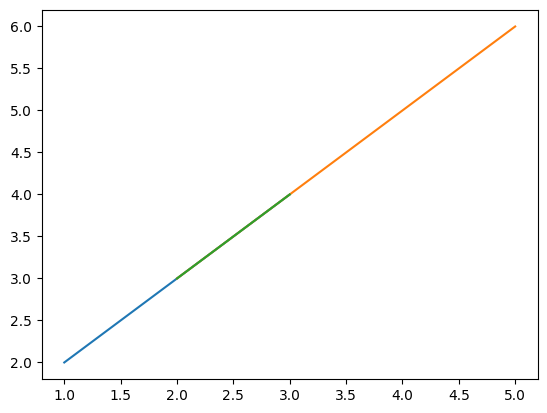

No hay intersecciones entre los segmentos


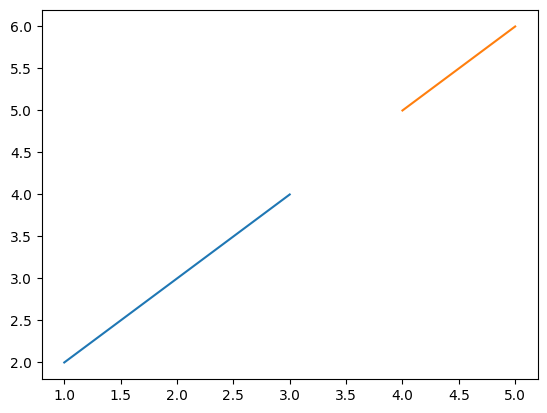

In [375]:
p1_segments = [segment(1, 2, 3, 4), segment(3, 4, 5, 6), segment(2, 3, 5, 6), segment(4, 5, 5, 6)]

plt.plot([p1_segments[0].p1.x, p1_segments[0].p2.x], [p1_segments[0].p1.y, p1_segments[0].p2.y])
plt.plot([p1_segments[1].p1.x, p1_segments[1].p2.x], [p1_segments[1].p1.y, p1_segments[1].p2.y])

resp1 = p1_segments[0].find_inter(p1_segments[1])
plt.plot(resp1.x, resp1.y, 'ro')
plt.show()

plt.figure()
plt.plot([p1_segments[0].p1.x, p1_segments[0].p2.x], [p1_segments[0].p1.y, p1_segments[0].p2.y])
plt.plot([p1_segments[2].p1.x, p1_segments[2].p2.x], [p1_segments[2].p1.y, p1_segments[2].p2.y])
resp2 = p1_segments[0].find_inter(p1_segments[2])
plt.plot([resp2.p1.x, resp2.p2.x], [resp2.p1.y, resp2.p2.y])
plt.show()

plt.figure()
plt.plot([p1_segments[0].p1.x, p1_segments[0].p2.x], [p1_segments[0].p1.y, p1_segments[0].p2.y])
plt.plot([p1_segments[3].p1.x, p1_segments[3].p2.x], [p1_segments[3].p1.y, p1_segments[3].p2.y])
resp3 = p1_segments[0].find_inter(p1_segments[3])
plt.show()

## Segunda pregunta
- Se define la clase puntos para el procesamiento de la lista y la realizacion de la marcha de Jarvis
- Realizacion de caso de la preguna
- Identificacion de modelo de perimetro usando el Convex Hull

In [383]:
# Clase puntos
# Input: Lista
# La lista realiza los ordenamientos y el procesamiento a puntos para usar los metodos necesarios
class points:
    def __init__(self,array):
        self.array = np.array([p for p in array])
        self.array = self.array[np.lexsort((self.array[:, 1], self.array[:, 0]))]
    
    # Hull (Marcha de Jarvis)
    # Input: Booleano en caso de no querer ver las graficas del proceso
    # Output: Lista de puntos ordenados para la realizacion del poligono convexo
    #         (opcional: Graficas de proceso) 
    def hull(self, visual = True):
            s = [point(self.array[0][0], self.array[0][1])]
            if visual:
                fig = plt.figure()
                plt.scatter(self.array[:,0], self.array[:,1])
                plt.draw()
                plt.pause(1)
            self.array = np.array([point(p[0], p[1]) for p in self.array]) # Conversion a puntos
            p = self.array[1]
            while p != s[0]: # Ciclo hasta volver a punto inicial
                if visual: 
                    plt.scatter([p.x for p in self.array], [p.y for p in self.array])
                p = self.array[1] 
                for i in range(0,len(self.array)): # Iteracion de puntos fuera de hull (y el inicial)
                    plt.plot([s[-1].x, self.array[i].x], [s[-1].y, self.array[i].y])
                    if s[-1].cross_prod(p, self.array[i]) < 0: # Revision de giros a izquierda
                        p = self.array[i]
                s.append(p) # Agregar punto final
                if visual:
                    xcor = [p.x for p in s]
                    ycor = [p.y for p in s]
                    plt.plot(xcor, ycor)
                    plt.pause(1)
                    plt.draw()
                self.array = np.delete(self.array, np.where(self.array == p)) # Eliminar revisados
            if visual:
                plt.show()
            s.append(s[0])
            return np.array(s)           
        

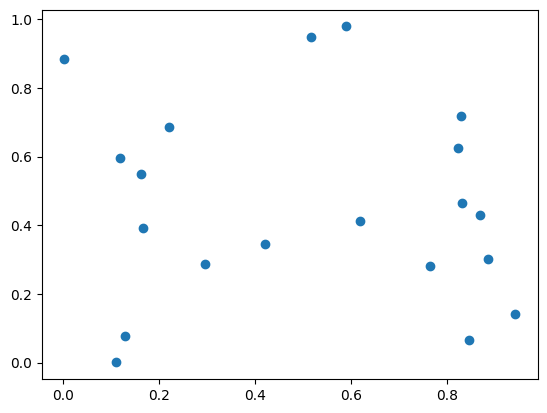

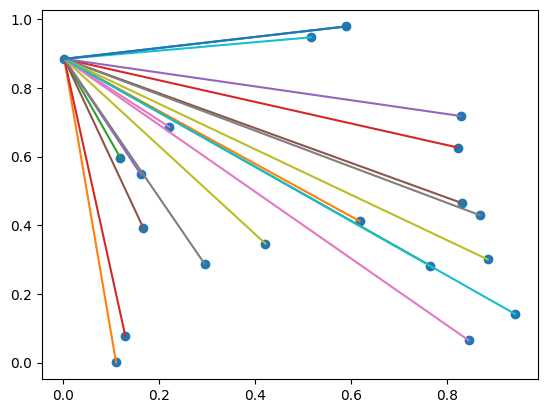

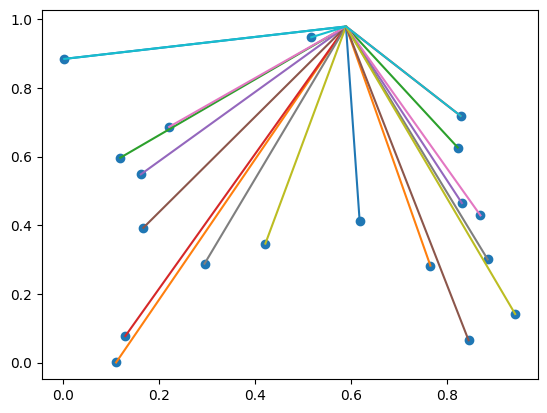

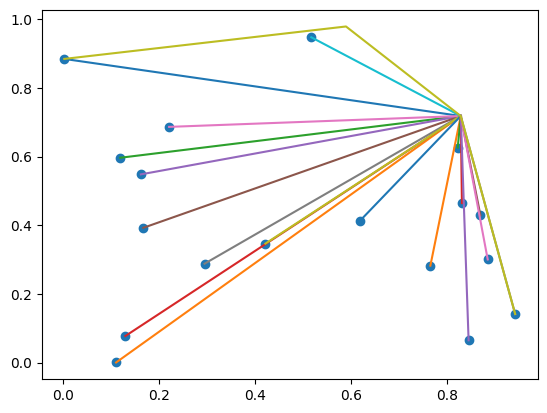

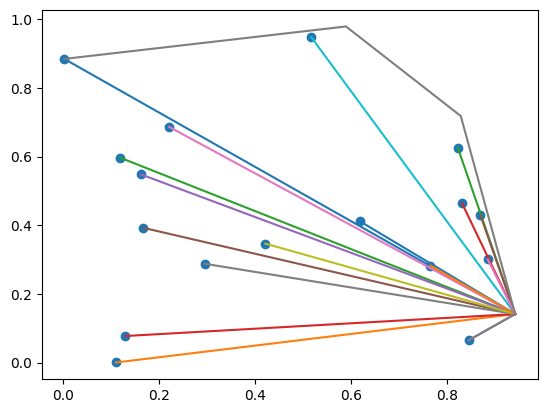

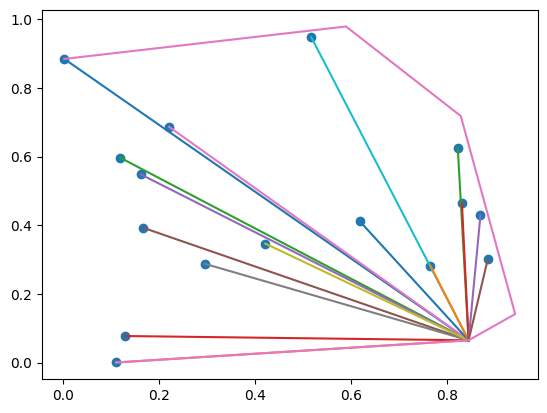

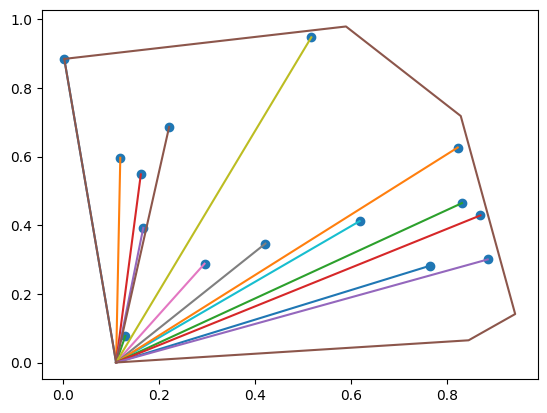

<Figure size 640x480 with 0 Axes>

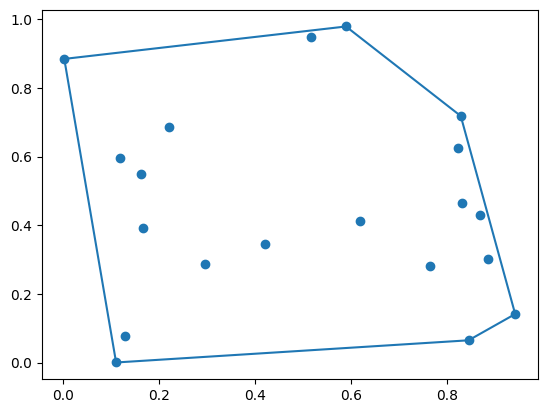

In [384]:
np.random.seed(23)
X = np.random.rand(20 , 2)

p2_lista = points(X)
p2_hull = p2_lista.hull()

plt.scatter(X[:,0], X[:,1])
xcor = [p.x for p in p2_hull]
ycor = [p.y for p in p2_hull]
plt.plot(xcor, ycor)
plt.show()


El algoritmo Convex Hull puede usarse en la detección de perímetros. Según la investigación realizada por A. P. Renold y S. Chandrakala (2017) el convex hull puede ser útil para detectar perímetros de bases militares temporales donde los perímetros son delimitados por sensores inalámbricos. El problema de estos sensores llega a ser no solo la detección de movimiento sino identificar si este movimiento cuanta como intrusión o no. Por esto mismo se emplea el algoritmo para la detección automática de que nodos realmente cuentan como nodos de frontera y por tanto delimitan el perímetro de la base haciendo que movimientos detectados entre ellos puedan ser considerados intrusos.

## Tercera pregunta
- Definir clase nodo
- Definir funciones de arbol
- Definir clase linea de barrido
- Realizar ejercicio propuesto en pregunta (se usa pandas para leer csv)

In [379]:
# Clase nodo
# Input: valor 
#        (opcional) 2 nodos hijos, punto y para orden, nodo padre
class Node:
    def __init__(self, val, lc = None, rc = None, y = None, parent = None):
        self.val = val
        self.lc = lc
        self.rc = rc
        self.parent = parent
        if isinstance(self.val, segment):
            self.seg = val
            self.val = val.middle(y)
            
# Insertar
# Input: Nodo raiz
#        (opcional) Punto y para orden, nodo padre
# Inserta puntos al arbol ordenado segun el ordenamiento de la clase puntos
def insert(root, new , y = None, parent = None):
    if isinstance(new, segment):  # Caso de segmento
        test = new.middle(y)
        if root is None:
            return Node(new, y = y, parent = parent)
        elif test < root.val:
            root.lc = insert(root.lc, new, y, parent = root)
            return root
        else:
            root.rc = insert(root.rc, new, y, parent = root)
            return root
    else: # Caso general
        if root is None:
            return Node(new)
        elif new < root.val:
            root.lc = insert(root.lc, new, parent = root)
        else:
            root.rc = insert(root.rc, new, parent = root)
        return root
    
# Borrar
# Input: Nodo raiz, segmento a borrar
# Output: Ninguno
# Se busca el nodo correspondiente al segmento, se convierte en nulo o reemplaza por el siguiente nodo 
# correspondiente y se realizan los reordenamientos necesarios
def delete(root, ded):
    if root is not None: # Verifica que hay algo para borrar
        if hasattr(root, 'seg'): # Verifica que se borran nodos de segmento
            if ded == root.seg: # Nodo es segmento
                if root.rc is not None:
                    if root.lc:
                        smallest = find_smallest_seg(root.rc) # Encuentra reemplazo
                        if smallest == root.rc:
                            root.seg = root.rc.seg
                            root.val = root.rc.val
                            root.rc = root.rc.rc  
                        else:
                            new_seg = smallest.seg
                            new_val = smallest.val
                            delete(root.rc, new_seg)
                            root.seg = new_seg
                            root.val = new_val
                            root.rc.parent = root
                    else:
                        root.seg = root.rc.seg
                        root.val = root.rc.val
                        root.lc = root.rc.lc
                        root.rc = root.rc.rc                        
                elif root.lc != None:
                    root.seg = root.lc.seg
                    root.val = root.lc.val
                    root.rc = root.lc.rc
                    root.lc = root.lc.lc
                else:
                    if not root.parent:
                        root = None
            else: # No es el segmento
                if root.lc:
                    if root.lc.seg == ded:
                        if root.lc.lc or root.lc.rc:
                            delete(root.lc, ded)
                        else:
                            root.lc = None
                    else: 
                        delete(root.lc, ded)
                
                if root.rc:
                    if root.rc.seg == ded:
                        if root.rc.lc or root.rc.rc:
                            delete(root.rc, ded)
                        else:
                            root.rc = None
                    else:
                        delete(root.rc, ded)

# Actualizar
# Input: Nodo raiz, coordenada y
# Output: Ninguno
# Cambia los valores de los puntos a los pundos que intresectan la linea de barrido 
def update(root, y):
    root.val = root.seg.middle(y)
    if root.lc:
        update(root.lc, y)
    if root.rc:
        update(root.rc, y)

# Encontrar menor segmento
# Input: Nodo raiz
# Output: Nodo
def find_smallest_seg(root):
    if root.lc == None:
        return root
    else:
        return find_smallest_seg(root.lc)
        
# Encontrar nodo izquierdo de p
# Input: Nodo raiz, lista de dos coordenadas
#        (opcional) Nodo candidato
# Output: Nodo
def find_p_left(root, p, node = None):
    if p[0] < root.val[0]:
        if root.rc:
            find_p_left(root.rc, p, root)
        else:
            return root
    else:
        if node:
            if root.lc:
                find_p_left(root.lc, p)
            else:
                return node
        else:
            if root.lc:
                find_p_left(root.lc,p)

# Encontrar nodo derecho de p
# Input: Nodo raiz, lista de dos coordenadas
#        (opcional) Nodo candidato
# Output: Nodo
def find_p_right(root, p, node = None):
    if p[0] > root.val[0]:
        if root.lc:
            find_p_right(root.lc, p, root)
        else:
            return root
    else:
        if node:
            if root.rc:
                find_p_right(root.rc, p)
            else:
                return node
        else:
            if root.rc:
                find_p_right(root.rc,p)
    
# En orden
# Input: Nodo raiz
# Output: Lista de lista en formato [Valor, segmento] ordenados segun el valor del punto
def inorder(root):
    result = [] 
    if root:
        result.extend(inorder(root.lc))
        if hasattr(root, 'seg'):
            result.append([root.val, root.seg])
        else:
            result.append(root.val)
        result.extend(inorder(root.rc))
    return result

In [385]:
# Clase de linea de barrido
# Input: Lista de segmentos
# Encuentra las intersecciones y las guarda en el atributo intersections en formato de lista de listas
class sweeper:
    def __init__(self, x):
        self.segs = x
        self.intersections = []
        self.ini = []
        self.fin = []
        x_ord = []
        for i in range(len(x)):
            arr = x[i].to_array()
            x_ord.extend(arr)
            self.ini.append([arr[0], self.segs[i]])
            self.fin.append([arr[1], self.segs[i]])
        x_ord = np.array(x_ord)
        x_ord = x_ord[np.lexsort([-x_ord[:,0],x_ord[:,1]])] 
        self.events = x_ord.tolist() # Eventos ordenados de menor a mayor segun ordenamiento de clase punto
        self.tau = None
        self.line = None
    
    # Encontrar interseccion
    # Input: (opcional) Booleano en caso de no querer ver graficas de proceso
    # Output: Ninguno
    # Itera sobre los puntos en la lista de eventos y llama Manipular punto p sobre estos
    def findInter(self, view = True): 
        while len(self.events):
            change = True
            aux = self.line
            self.line = self.events.pop()
            print(f'Revisando punto: {self.line}')
            self.manipulate_p()
            if view == True:
                if aux:
                    if aux[1] == self.line[1]:
                        change = False
                self.plot(change)
    
    # Manipular punto p
    # Input: Ninguno
    # Output: Ninguno
    # Dado un punto de la linea de barrido revisa aquellos segmentos que inician, cruzan o terminan en el
    # se mantienen mensajes de alerta para casos que generan problema
    def manipulate_p(self):
        testing = [x[1] for x in inorder(self.tau)]
        if len(testing) != len(set(testing)): # Revision en caso de que se tenga un segmento duplicado
            print(1000*'!')
        U_p = [p for p in self.ini if p[0] == self.line]
        L_p = [p for p in self.fin if p[0] == self.line]
        aux_l = [x[1] for x in L_p]
        if self.tau:
            update(self.tau, self.line[1]) # Se actualizan los valores para identificar cruces
        C_p = [p for p in inorder(self.tau) if \
               (p[1].middle(self.line[1])[0] > self.line[0] - 0.001 and p[1].middle(self.line[1])[0] < self.line[0] + 0.001) \
                and p[1] not in aux_l]
        
        # Revision de interseccion
        if len(U_p)+len(L_p)+len(C_p) > 1:
            temp = [self.line]
            temp.append([x[1] for x in U_p])
            temp.append([x[1] for x in C_p])
            temp.append([x[1] for x in L_p])
            self.intersections.append(temp)
        
        # Borrado de segmentos finalizados y medios
        for p in L_p:
            if len(inorder(self.tau)) == 1:
                self.tau = None
            else:
                delete(self.tau, p[1])
        for p in C_p:
            delete(self.tau, p[1])
            
        # Ingreso de segmentos iniciales y medios
        for p in U_p:
            if self.tau == None:
                self.tau = Node(p[1], y=self.line[1]-.005)
            else:
                insert(self.tau, p[1], y=self.line[1]-.005)    
        for p in C_p:
            insert(self.tau, p[1], y=self.line[1]-.005)
        
        # Manejo de eventos
        if len(U_p)+len(C_p) == 0: # Solo finalizan segmentos
            if self.tau != None: # En caso de tener con que revisar
                sl = find_p_left(self.tau, self.line)
                sr = find_p_right(self.tau, self.line)   
                if sl and sr:
                    self.find_event(sl, sr, self.line) # Buscar eventos entre vecinos de segmento finalizado
        else: # Hay eventos iniciales o medios
            aux_u = [x[1] for x in U_p]
            aux_c = [x[1] for x in C_p]
            points = inorder(self.tau)
            aux_ps = [x for x in points if x[1] in aux_u or x[1] in aux_c] # Eventos iniciales o medios en tau
            if len(aux_ps) > 1:
                aux_ps =  sorted(aux_ps, key=lambda x: (x[0][0])) # Ordenar eventos a revisar
                sl = aux_ps[0][1]
                sr = aux_ps[-1][1]
                indl = points.index(aux_ps[0])
                indr = points.index(aux_ps[-1])
                if indl > 0:
                    self.find_event(sl, points[indl-1][1], self.line) # Evento izquierdo con vecino izquierdo
                if indr < len(points)-1:
                    self.find_event(sr, points[indr+1][1], self.line) # Evento derecho con vecino derecho
                
            elif len(aux_ps) == 1: # Solo hay un evento, revisa sus vecinos
                ind = points.index(aux_ps[0])
                if points != aux_ps:
                    if ind == 0:
                        self.find_event(aux_ps[0][1], points[ind+1][1], self.line)
                    elif ind == len(points)-1:
                        self.find_event(points[ind-1][1], aux_ps[0][1], self.line)
                    else:
                        self.find_event(aux_ps[0][1], points[ind+1][1], self.line)
                        self.find_event(points[ind-1][1], aux_ps[0][1], self.line)
            else:
                print('Tercer caso' + 100*'!') # Caso no deseado, mensaje de alerta. No deberia de entrar aca
    
    # Encontrar evento
    # Input: 2 segmentos y punto p
    # Output: Ninguno
    def find_event(self, sl, sr, p):
        p = point(p[0], p[1])
        new = sl.find_inter(sr) # Encuentra la interseccion
        if new and p < new: # Revisa que si se obtenga una interseccion y que esta sea mayor al punto p
            self.events.append([round(new.x,4), round(new.y,4)])
            self.events =  sorted(self.events, key=lambda x: (x[1], -x[0])) # Ordena eventos
    
    # Plotear
    # Input: (opcional) Booleano en caso de no querer ver graficas de proceso
    # Output: Graficas de proceso
    def plot(self, change=True):
        for p, seg in self.ini:
            plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y])
        if self.line and change:
            plt.axhline(self.line[1])
        for p in linea.intersections:
            plt.plot(p[0][0], p[0][1], 'ro')
        plt.pause(1)
        plt.draw()

In [386]:
df = pd.read_csv('segmentos.csv')
df

,x0,y0,x1,y1
0,0.517,0.947,0.765,0.282
1,0.221,0.686,0.167,0.392
2,0.618,0.412,0.002,0.884
3,0.885,0.300,0.590,0.978
4,0.845,0.065,0.295,0.288
5,0.822,0.626,0.110,0.001
6,0.942,0.142,0.422,0.346
7,0.870,0.429,0.829,0.718
8,0.119,0.596,0.130,0.078
9,0.831,0.464,0.162,0.548


Revisando punto: [0.59, 0.978]


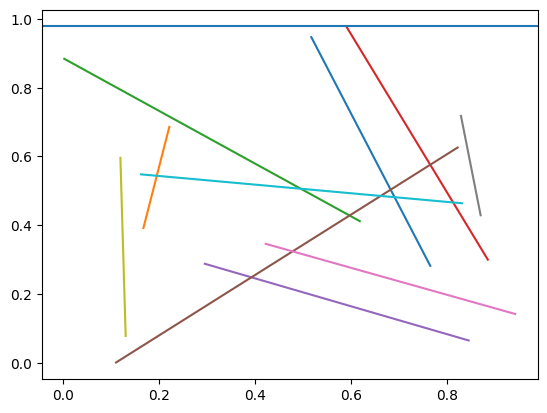

Revisando punto: [0.517, 0.947]


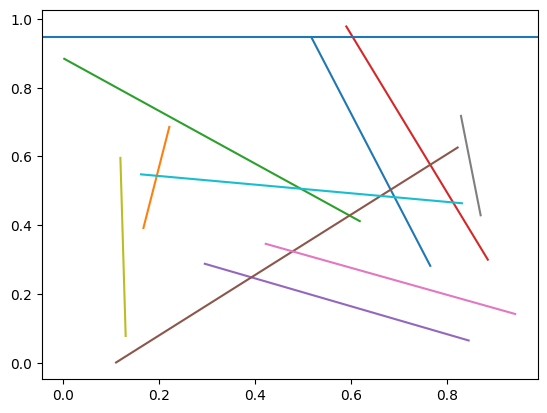

Revisando punto: [0.002, 0.884]


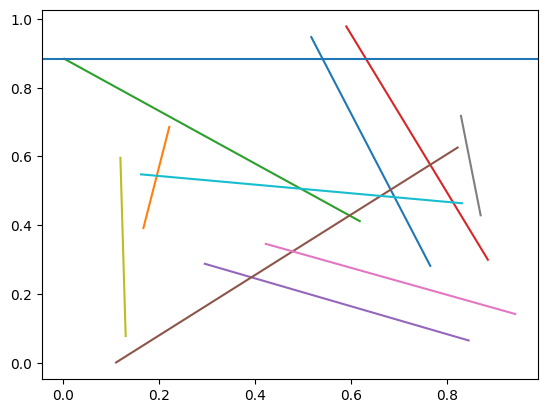

Revisando punto: [0.829, 0.718]


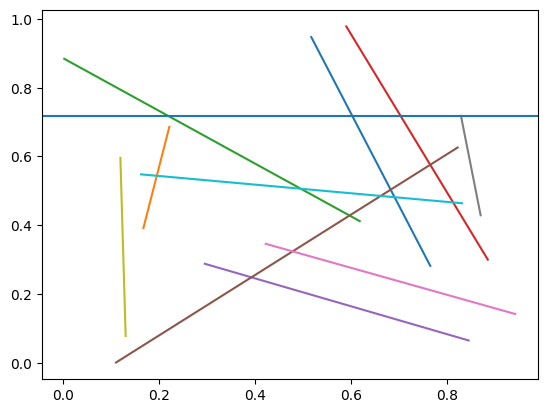

Revisando punto: [0.221, 0.686]


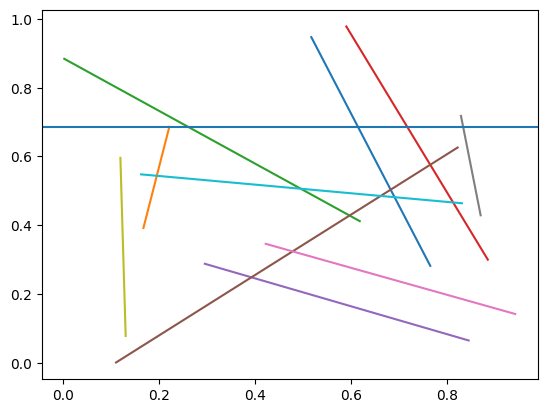

Revisando punto: [0.822, 0.626]


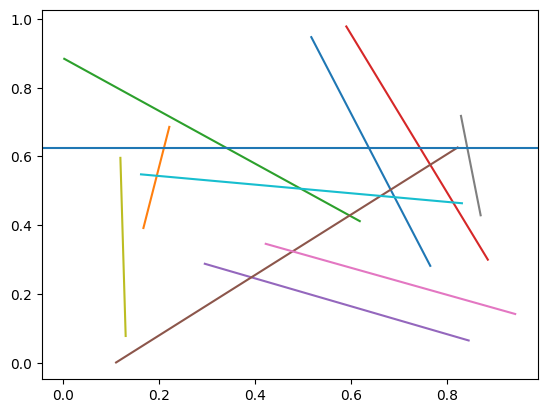

Revisando punto: [0.119, 0.596]


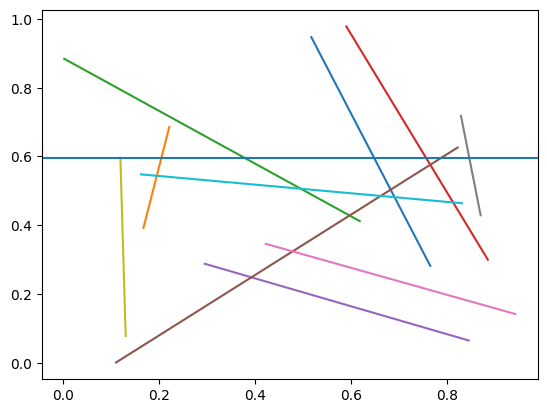

Revisando punto: [0.7649, 0.5759]


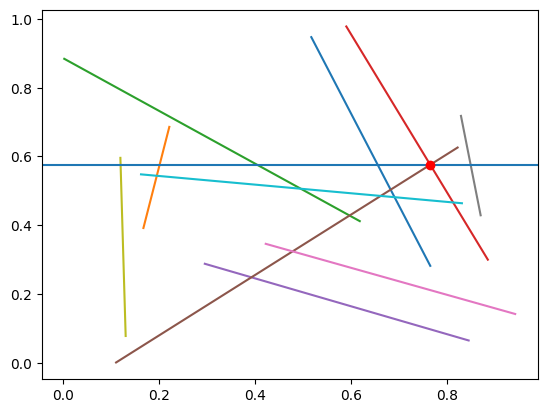

Revisando punto: [0.162, 0.548]


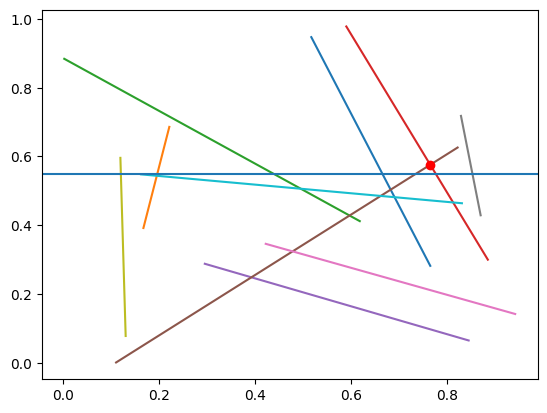

Revisando punto: [0.1949, 0.5439]


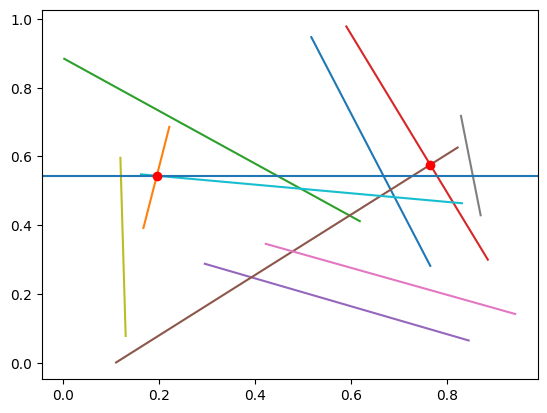

Revisando punto: [0.4951, 0.5062]


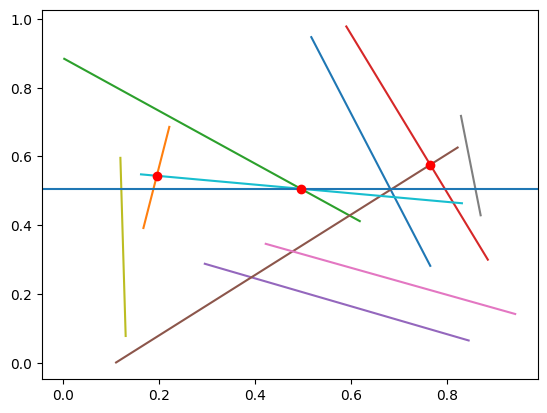

Revisando punto: [0.4951, 0.5062]


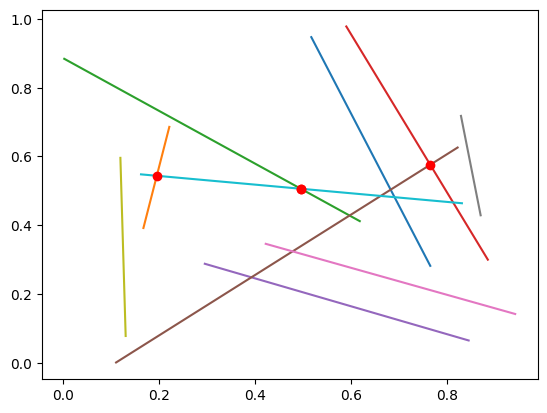

Revisando punto: [0.6824, 0.5035]


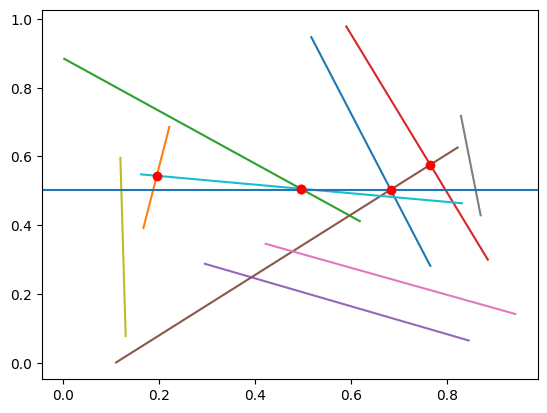

Revisando punto: [0.6617, 0.4853]


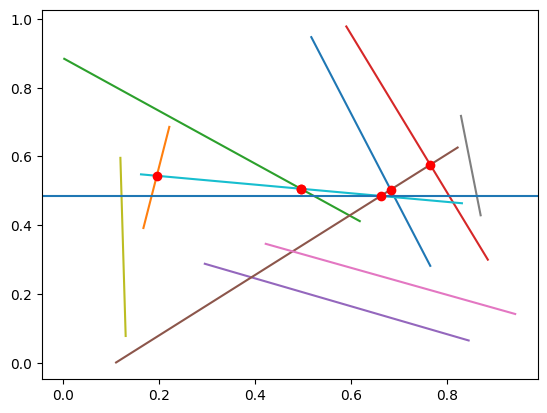

Revisando punto: [0.6905, 0.4816]


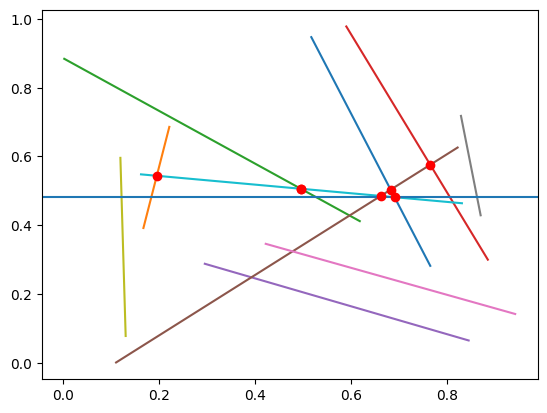

Revisando punto: [0.6905, 0.4816]


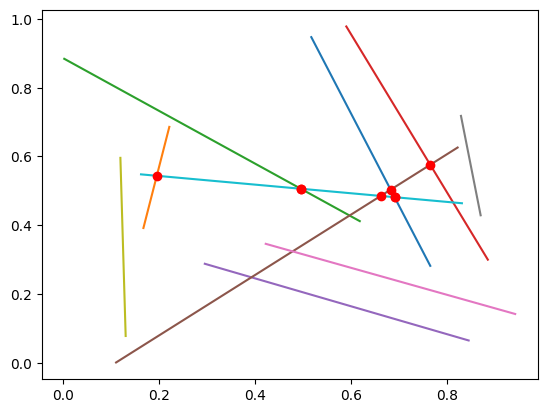

Revisando punto: [0.8126, 0.4663]


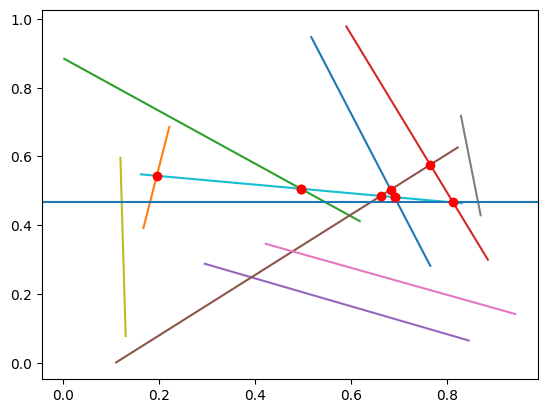

Revisando punto: [0.8126, 0.4663]


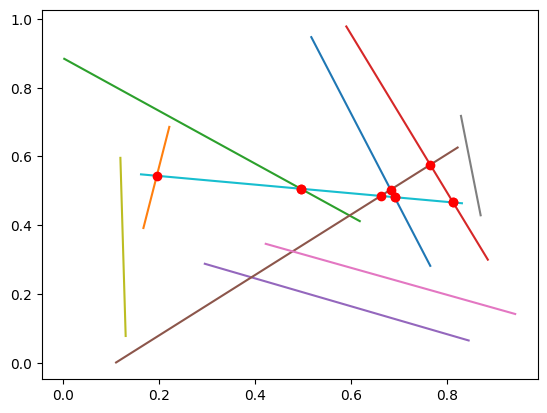

Revisando punto: [0.8126, 0.4663]


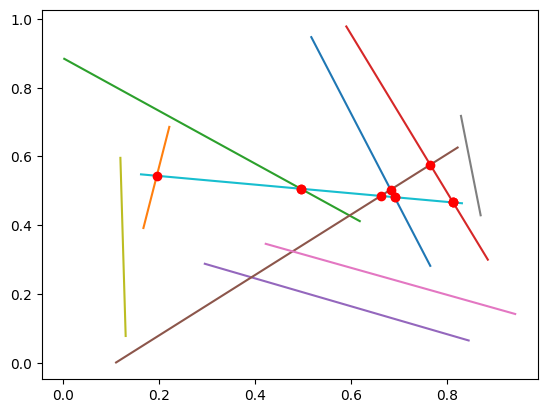

Revisando punto: [0.831, 0.464]


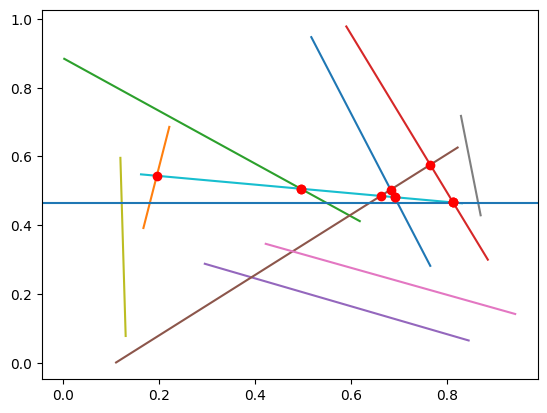

Revisando punto: [0.87, 0.429]


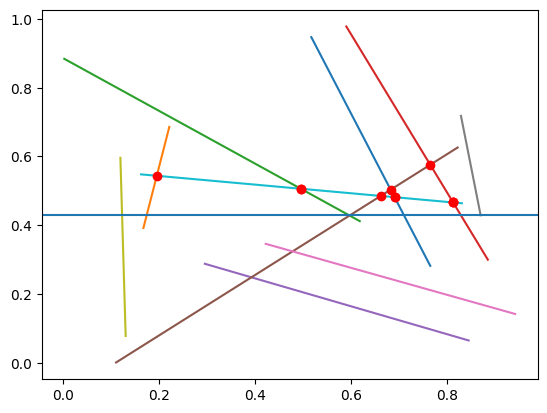

Revisando punto: [0.5968, 0.4283]


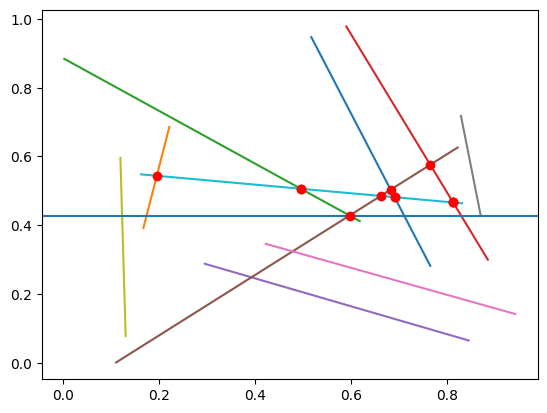

Revisando punto: [0.618, 0.412]


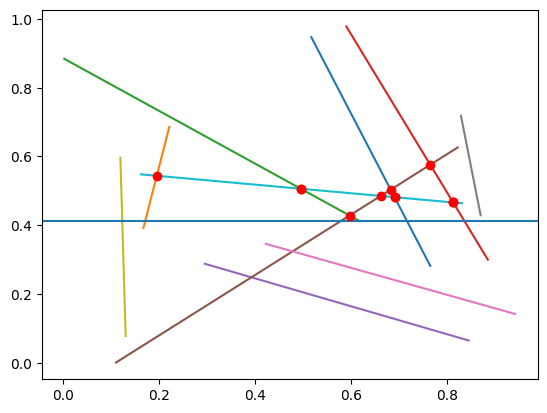

Revisando punto: [0.167, 0.392]


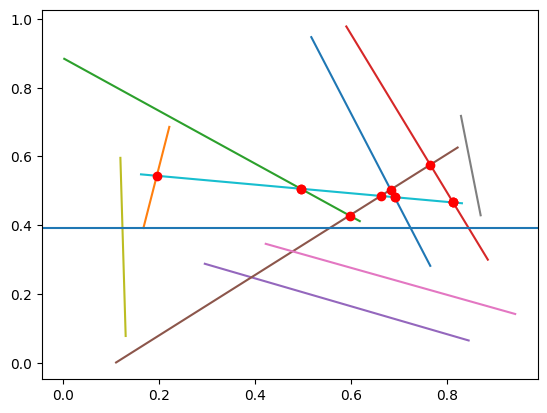

Revisando punto: [0.422, 0.346]


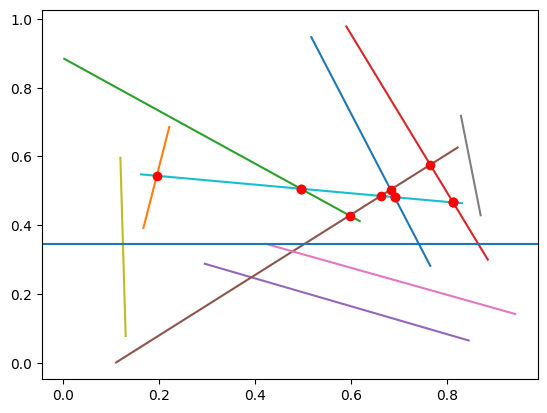

Revisando punto: [0.478, 0.324]


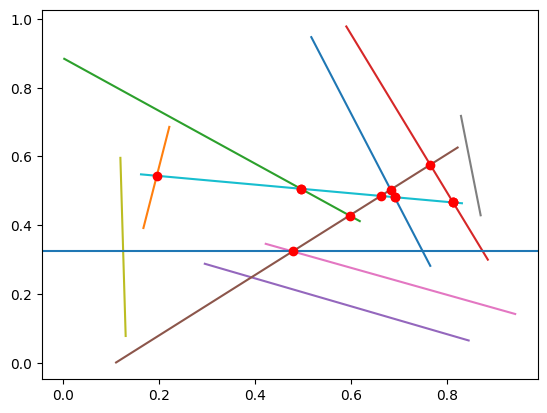

Revisando punto: [0.885, 0.3]


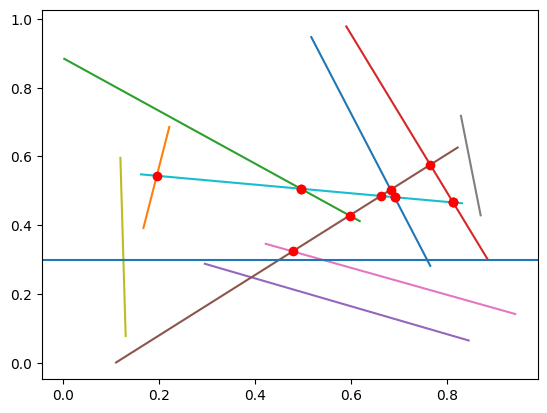

Revisando punto: [0.295, 0.288]


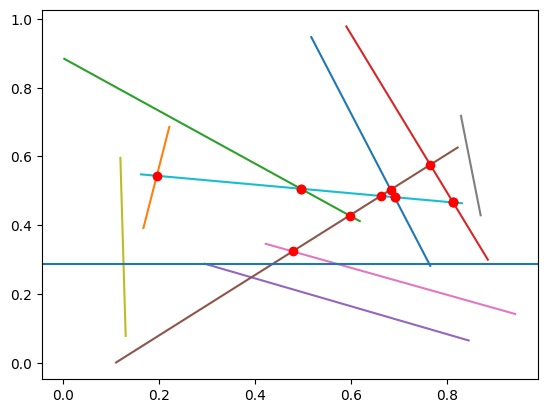

Revisando punto: [0.765, 0.282]


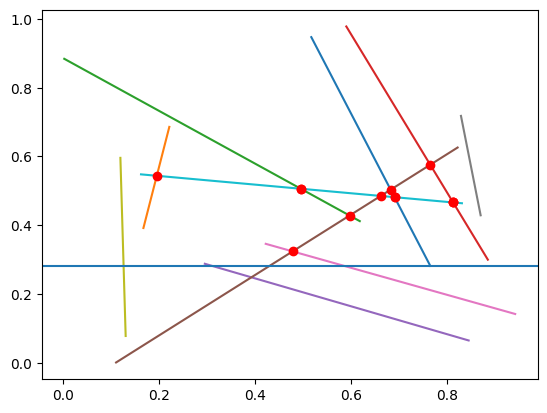

Revisando punto: [0.3921, 0.2486]


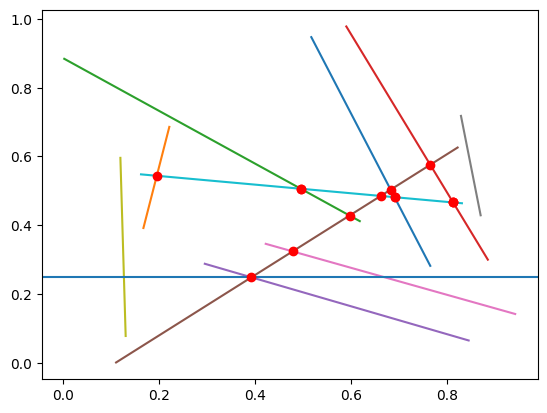

Revisando punto: [0.942, 0.142]


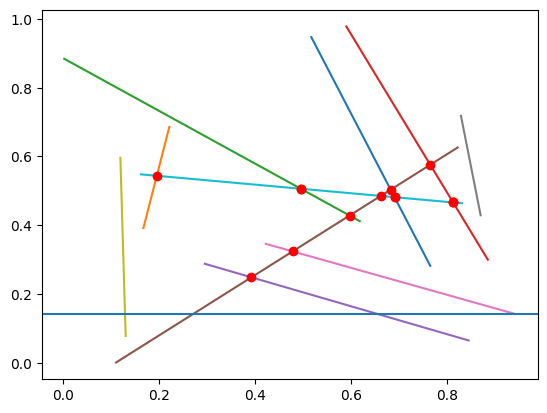

Revisando punto: [0.13, 0.078]


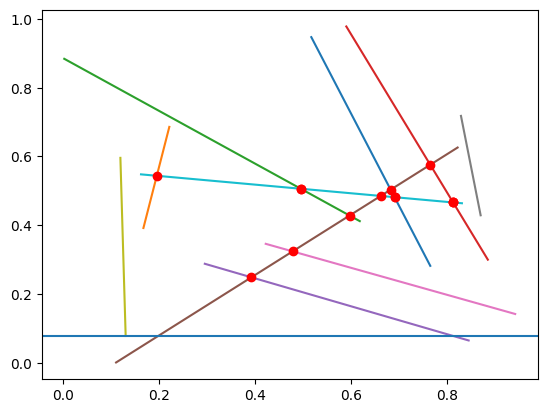

Revisando punto: [0.845, 0.065]


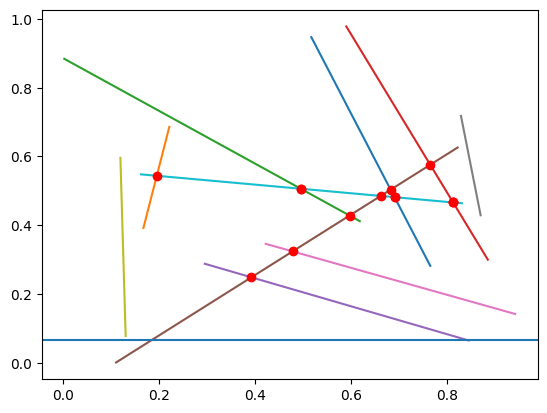

Revisando punto: [0.11, 0.001]


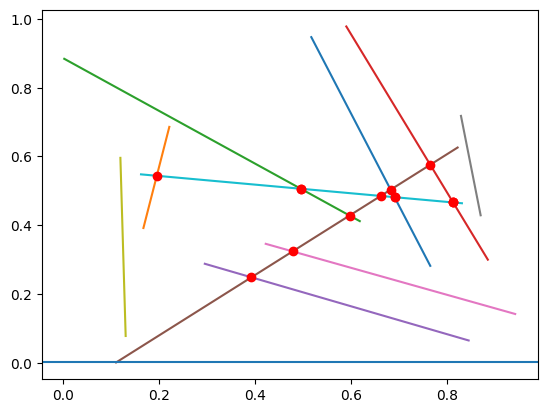

Intersecciones con puntos superiores, medios e inferiores:
[[0.7649, 0.5759], [], [(0.59,0.978) -> (0.885,0.3), (0.822,0.626) -> (0.11,0.001)], []]
[[0.1949, 0.5439], [], [(0.221,0.686) -> (0.167,0.392), (0.162,0.548) -> (0.831,0.464)], []]
[[0.4951, 0.5062], [], [(0.162,0.548) -> (0.831,0.464), (0.002,0.884) -> (0.618,0.412)], []]
[[0.4951, 0.5062], [], [(0.002,0.884) -> (0.618,0.412), (0.162,0.548) -> (0.831,0.464)], []]
[[0.6824, 0.5035], [], [(0.517,0.947) -> (0.765,0.282), (0.822,0.626) -> (0.11,0.001)], []]
[[0.6617, 0.4853], [], [(0.162,0.548) -> (0.831,0.464), (0.822,0.626) -> (0.11,0.001)], []]
[[0.6905, 0.4816], [], [(0.517,0.947) -> (0.765,0.282), (0.162,0.548) -> (0.831,0.464)], []]
[[0.6905, 0.4816], [], [(0.517,0.947) -> (0.765,0.282), (0.162,0.548) -> (0.831,0.464)], []]
[[0.8126, 0.4663], [], [(0.162,0.548) -> (0.831,0.464), (0.59,0.978) -> (0.885,0.3)], []]
[[0.8126, 0.4663], [], [(0.59,0.978) -> (0.885,0.3), (0.162,0.548) -> (0.831,0.464)], []]
[[0.8126, 0.4663], [], 

<Figure size 640x480 with 0 Axes>

In [387]:
segmentos = []
for i in range(len(df)):
    segmentos.append(segment(df['x0'][i], df['y0'][i], df['x1'][i], df['y1'][i]))
linea = sweeper(segmentos)
linea.findInter()
print('Intersecciones con puntos superiores, medios e inferiores:')
for i in linea.intersections: 
    print(i)
#for p in linea.intersections:
    #plt.plot(p[0][0], p[0][1], 'ro')

## Bibliografia

- A. P. Renold and S. Chandrakala, "Convex-Hull-Based Boundary Detection in Unattended Wireless Sensor Networks," in IEEE Sensors Letters, vol. 1, no. 4, pp. 1-4, Aug. 2017, Art no. 7500604, doi: 10.1109/LSENS.2017.2731200.
- Check if an Object has a specific Method in Python | bobbyhadz. (n.d.). Retrieved from https://bobbyhadz.com/blog/python-check-if-object-has-method
- Gift Wrap Algorithm (Jarvis March Algorithm) to find Convex Hull. (n.d.). Retrieved from https://iq.opengenus.org/gift-wrap-jarvis-march-algorithm-convex-hull/
- mouad. (2011, March 6). Answer to “Sorting a Python list by two fields.” Stack Overflow. https://stackoverflow.com/a/5212885